# Import libraries

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [3]:
np.random.seed(42)


In [4]:
def load(symbol,start_date,end_date):
  df = yf.download(symbol, start=start_date, end=end_date)
  return df

In [5]:
symbol ='BKNG'
stock_company = 'Booking Holdings Inc'

start_date = '2018-01-01'
end_date =  '2021-11-20'

df = load(symbol,start_date, end_date)
print(df.head())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02  1750.089966  1790.660034  1744.500000  1784.750000  1784.750000   
2018-01-03  1790.229980  1829.020020  1785.000000  1824.160034  1824.160034   
2018-01-04  1838.540039  1848.900024  1802.030029  1807.250000  1807.250000   
2018-01-05  1820.180054  1825.500000  1805.800049  1823.540039  1823.540039   
2018-01-08  1827.489990  1874.949951  1825.189941  1851.810059  1851.810059   

            Volume  
Date                
2018-01-02  475500  
2018-01-03  525000  
2018-01-04  592600  
2018-01-05  358600  
2018-01-08  555600  


In [6]:
df = df.drop(columns='Adj Close')

In [7]:
df.shape

(980, 5)

In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

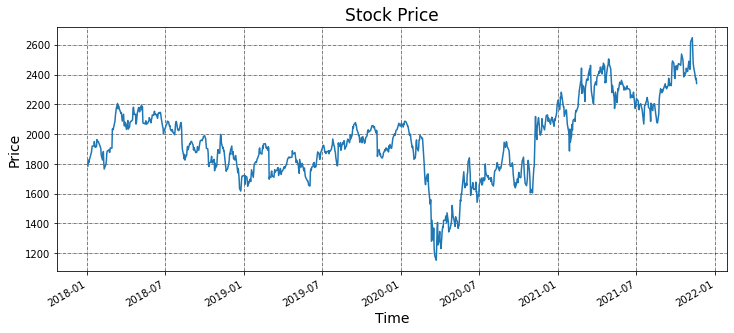

In [9]:
df['Close'].plot(figsize=(12, 5))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [16]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [18]:
x = df.drop(columns=['Close'])
y = df['Close']

In [22]:
# Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8 , shuffle=False,random_state = 0)

In [23]:
# let's check if total observation makes sense
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(196, 4)
(784, 4)
(196,)
(784,)


Regression algorithm model implementation


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-6.72555596e-01  8.63241171e-01  8.13426922e-01 -6.88053184e-06]
regression intercept -7.057974192703796


Prediction and Estimation


In [28]:
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9971744697885793


In [29]:
predicted=regression.predict(test_x)
print(test_x.head())


                   Open         High          Low  Volume
Date                                                     
2018-10-11  1779.619995  1808.020020  1757.160034  613000
2018-10-12  1814.869995  1829.050049  1791.780029  698600
2018-10-15  1803.579956  1826.250000  1790.020020  407100
2018-10-16  1825.000000  1835.640015  1819.900024  359400
2018-10-17  1834.400024  1858.290039  1823.500000  326600


In [30]:
predicted.shape


(784,)

In [31]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
Date,,
2018-10-11,1781.709961,1781.909469
2018-10-12,1807.170044,1803.927734
2018-10-15,1811.329956,1809.677831
2018-10-16,1830.270020,1828.010910
2018-10-17,1850.510010,1844.395303
2018-10-18,1811.709961,1819.716355
2018-10-19,1805.739990,1814.752875
2018-10-22,1827.290039,1841.298709
2018-10-23,1830.000000,1830.460992


In [32]:
dfr.describe()

,Actual_Price,Predicted_Price
count,784.000000,784.000000
mean,1947.611469,1947.260430
std,282.149722,283.494941
min,1152.239990,1161.320610
25%,1759.134979,1758.701232
50%,1907.460022,1909.354899
75%,2160.797546,2153.391432
max,2648.199951,2666.940858


Model Evaluation


In [33]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))




Mean Absolute Error (MAE): 10.890202141281916
Mean Squared Error (MSE) : 224.64921669543654
Root Mean Squared Error (RMSE): 14.988302662257542


In [35]:
# Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(test_y, predicted)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_y, predicted)/ test_y))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(test_y, predicted)/ test_y)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 10.89
Mean Absolute Percentage Error (MAPE): 0.58 %
Median Absolute Percentage Error (MDAPE): 0.43 %


In [47]:
predicted[-1]

2321.2930580872835

In [48]:
test_y[-1]

2339.989990234375

In [53]:
100*(test_y[-1]-predicted[-1])/test_y[-1]

0.7990176122599056

In [37]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)


The accuracy of the model is  100.01802735483042


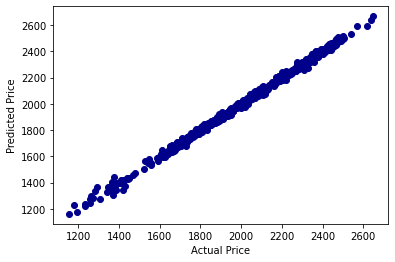

In [38]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

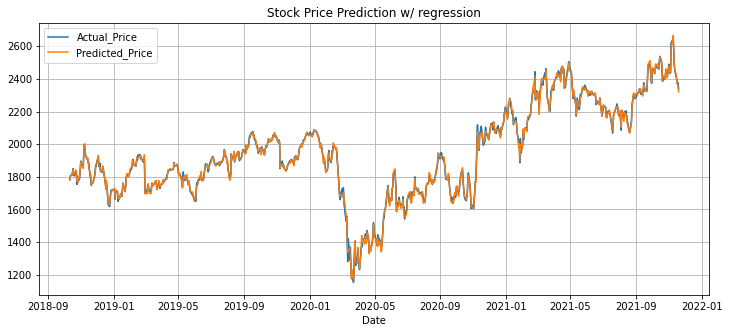

In [44]:
fig, ax1 = plt.subplots(figsize=(12, 5))
plt.plot(dfr.Actual_Price)
plt.plot(dfr.Predicted_Price)
plt.title(f"Stock Price Prediction w/ regression")
sns.lineplot(data=dfr[['Actual_Price',  'Predicted_Price']], linewidth=1.0, dashes=False, ax=ax1)

plt.grid()
plt.legend()